# Question D15

*Question*: What are the ML algorithms employed in the ML-enabled system projects in which you participated?

*Answer Type*: Multiple Option and Free Field

*Options*: [Apriori, Bayesian Networks, DBSCAN, Decision Trees, Ensembles (e.g., Random Forests, XGBoost), Gaussian Mixtures, K-Means, K-Nearest Neighbors (KNN), Linear/Polynomial Regression, Logistic Regression,
Naive Bayes, Neural Networks (e.g. MLP, CNN, LSTM, RNN), Support Vector Machines (SVM), Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
algorithms = {
    'D15_ML_Algorithms_Apriori': 'Apriori',
    'D15_ML_Algorithms_Bayesian': 'Bayesian Networks',
    'D15_ML_Algorithms_DBSCAN': 'DBSCAN',
    'D15_ML_Algorithms_Decision_Tree': 'Decision Trees',
    'D15_ML_Algorithms_Ensembles': 'Ensembles',
    'D15_ML_Algorithms_Gaussian_Mixture': 'Gaussian Mixtures',
    'D15_ML_Algorithms_KMeans': 'K-Means',
    'D15_ML_Algorithms_KNN': 'KNN',
    'D15_ML_Algorithms_Linear_Regression': 'Lin/Poly Regression', 
    'D15_ML_Algorithms_Logistic_Regression': 'Log Regression',
    'D15_ML_Algorithms_Naive_Bayes': 'Naive Bayes',
    'D15_ML_Algorithms_Neural_Networks': 'Neural Networks',
    'D15_ML_Algorithms_SVM': 'SVM',
    'D15_ML_Algorithms_Others': 'Others'
}

### Basic Analysis

In [5]:
dataframe_obj.df[['D15_ML_Algorithms_Apriori', 'D15_ML_Algorithms_Bayesian', 'D15_ML_Algorithms_DBSCAN', 'D15_ML_Algorithms_Decision_Tree',
                  'D15_ML_Algorithms_Ensembles', 'D15_ML_Algorithms_Gaussian_Mixture', 'D15_ML_Algorithms_KMeans', 'D15_ML_Algorithms_KNN',
                  'D15_ML_Algorithms_Linear_Regression', 'D15_ML_Algorithms_Logistic_Regression', 'D15_ML_Algorithms_Naive_Bayes',
                  'D15_ML_Algorithms_Neural_Networks', 'D15_ML_Algorithms_SVM', 'D15_ML_Algorithms_Others', 'D15_ML_Algorithms_Others_Free']].head()

,D15_ML_Algorithms_Apriori,D15_ML_Algorithms_Bayesian,D15_ML_Algorithms_DBSCAN,D15_ML_Algorithms_Decision_Tree,D15_ML_Algorithms_Ensembles,D15_ML_Algorithms_Gaussian_Mixture,D15_ML_Algorithms_KMeans,D15_ML_Algorithms_KNN,D15_ML_Algorithms_Linear_Regression,D15_ML_Algorithms_Logistic_Regression,D15_ML_Algorithms_Naive_Bayes,D15_ML_Algorithms_Neural_Networks,D15_ML_Algorithms_SVM,D15_ML_Algorithms_Others,D15_ML_Algorithms_Others_Free
0,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
2,not quoted,not quoted,quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,GNN
3,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
4,quoted,not quoted,not quoted,quoted,quoted,not quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted,LGBM Catboosting


In [6]:
indexes = []
values = []
chart_positions = []
for algorithm in algorithms:
    indexes.append(algorithms[algorithm])
    values.append(dataframe_obj.df[algorithm].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in algorithm else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['D15_ML_Algorithms_Apriori'] == 'quoted' or row['D15_ML_Algorithms_Bayesian'] == 'quoted' or row['D15_ML_Algorithms_DBSCAN'] == 'quoted' or row['D15_ML_Algorithms_Decision_Tree'] == 'quoted' or row['D15_ML_Algorithms_Ensembles'] == 'quoted' or row['D15_ML_Algorithms_Gaussian_Mixture'] == 'quoted' or row['D15_ML_Algorithms_KMeans'] == 'quoted' or row['D15_ML_Algorithms_KNN'] == 'quoted' or row['D15_ML_Algorithms_Linear_Regression'] == 'quoted' or row['D15_ML_Algorithms_Logistic_Regression'] == 'quoted' or row['D15_ML_Algorithms_Naive_Bayes'] == 'quoted' or row['D15_ML_Algorithms_Neural_Networks'] == 'quoted' or row['D15_ML_Algorithms_SVM'] == 'quoted' or row['D15_ML_Algorithms_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
d15_plot = PlotUtils(pd.DataFrame(
    data={'Algorithms': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


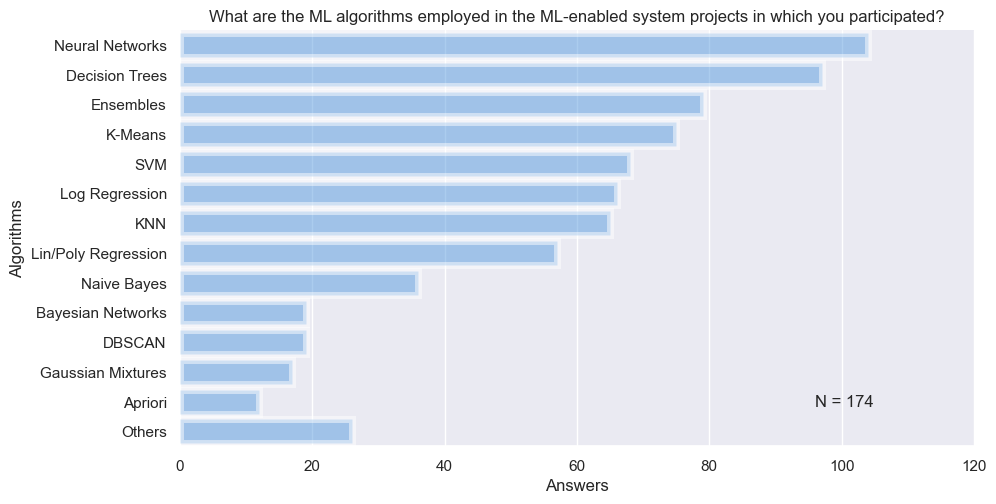

In [9]:
d15_plot.single_barplot(x_axis="Answers", y_axis="Algorithms",
                       title="What are the ML algorithms employed in the ML-enabled system projects in which you participated?",
                       x_label="Answers", y_label="Algorithms", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
# remove unnecessary values
algorithms_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['D15_ML_Algorithms_Others_Free'])))
algorithms_free = list(filter(lambda a: str(a) != 'nan', algorithms_free))

In [11]:
algorithms_words = format_wordcloud_text(texts=algorithms_free, use_sep=False)

In [12]:
# plot object
d15_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(algorithms_words.keys()), 'Weight': list(algorithms_words.values())}
))

In [13]:
d15_wc_plot.df.head()

,Word,Weight
0,GNN,1
1,LGBM Catboosting,1
2,"Kaplan Meyer, PCA, LDA, ANOVA, ARIMA seasonal,...",1
3,"Fuzzy Logic, Evolutionary Computation",1
4,Markovian Decision Processes and Uncertainty,1


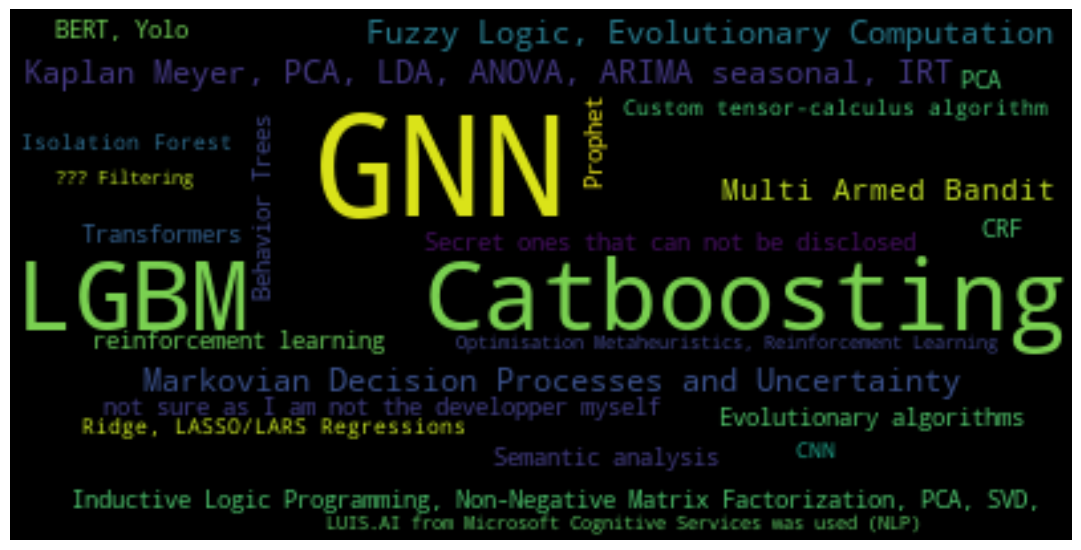

In [14]:
d15_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [15]:
prefix = "D15_ML_Algorithms_"

In [16]:
# the possible answers are the ones in columns
valid_options_list = [algorithm_column.split(prefix)[1] for algorithm_column in algorithms]

In [17]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'None' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [18]:
replacements = 1000
population_sample_size = total_answers_int # equals n - total valid answers

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [19]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [20]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [algorithms[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [21]:
# plot object for bootstrapped data
d15_boot_plot = PlotUtils(pd.DataFrame(
    data={'Algorithms': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


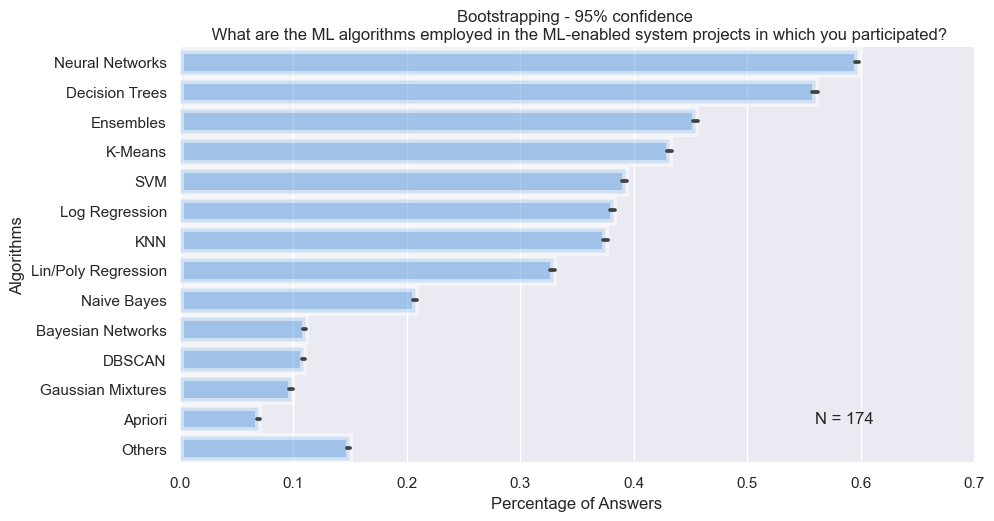

In [22]:
d15_boot_plot.single_barplot(x_axis="Value", y_axis="Algorithms", 
                       title="Bootstrapping - 95% confidence \n What are the ML algorithms employed in the ML-enabled system projects in which you participated?",
                       x_label="Percentage of Answers", y_label="Algorithms", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Apriori:(0.06796372938827912, 0.06910919540229885, 0.07025466141631857)
Bayesian:(0.10848659335808912, 0.10990804597701151, 0.1113294985959339)
DBSCAN:(0.10747592977096287, 0.1089022988505747, 0.11032866793018653)
Decision_Tree:(0.5576026955005625, 0.5601436781609196, 0.5626846608212767)
Ensembles:(0.45199259002264974, 0.45436781609195404, 0.45674304216125833)
Gaussian_Mixture:(0.09649060633826863, 0.09799425287356323, 0.09949789940885782)
KMeans:(0.42914506891742504, 0.43137356321839077, 0.4336020575193565)
KNN:(0.3725355152907517, 0.3748448275862069, 0.37715413988166213)
Linear_Regression:(0.3264355344484962, 0.328580459770115, 0.3307253850917338)
Logistic_Regression:(0.37903677231777383, 0.3815, 0.3839632276822262)
Naive_Bayes:(0.20562788830005213, 0.20744252873563218, 0.20925716917121223)
Neural_Networks:(0.594525940749663, 0.5967816091954024, 0.5990372776411417)
SVM:(0.3900943771017913, 0.39221264367816094, 0.3943309102545306)
Others:(0.147

In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Apriori:: P = 6.911 [6.796, 7.025]
Bayesian:: P = 10.991 [10.849, 11.133]
DBSCAN:: P = 10.89 [10.748, 11.033]
Decision_Tree:: P = 56.014 [55.76, 56.268]
Ensembles:: P = 45.437 [45.199, 45.674]
Gaussian_Mixture:: P = 9.799 [9.649, 9.95]
KMeans:: P = 43.137 [42.915, 43.36]
KNN:: P = 37.484 [37.254, 37.715]
Linear_Regression:: P = 32.858 [32.644, 33.073]
Logistic_Regression:: P = 38.15 [37.904, 38.396]
Naive_Bayes:: P = 20.744 [20.563, 20.926]
Neural_Networks:: P = 59.678 [59.453, 59.904]
SVM:: P = 39.221 [39.009, 39.433]
Others:: P = 14.868 [14.708, 15.028]
